In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# convert .ods to .xls
# add "Suburb" in cell A2

In [108]:
df = pd.read_excel("1_SS2015.xls", header=1)
df.head(15)

,Suburb,VALUE,UNIT,BUS_COMM,CLUSTER,DUMMY,EDU,FARM_AH,FLATS,GOV_INST,...,RES[ 1500],RES[ 2000],RES[>2000],STANDPIPE,UNKNOWN,LARGE,SUM,Losses (Theor),TOTAL,UNMETERED
0,BERGVLIET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,Occupied Stands,no.,8.000000,11.000000,0.0,3.000000,0.0,4.000000,0.0,...,480.000000,10.000000,10.000000,0.0,0.0,4.000000,1520.000000,--,1520.000000,0.0
2,,Occupied records,no.,19.000000,12.000000,0.0,8.000000,0.0,6.000000,0.0,...,499.000000,11.000000,11.000000,0.0,0.0,7.000000,1609.000000,--,1609.000000,0.0
3,,Occupied Units,no.,17.000000,11.000000,0.0,8.000000,0.0,4.000000,0.0,...,480.000000,10.000000,10.000000,0.0,0.0,5.000000,1542.000000,--,1542.000000,0.0
4,,Vacant Stands,no.,0.000000,61.000000,4.0,3.000000,0.0,1.000000,0.0,...,1.000000,0.000000,1.000000,0.0,0.0,0.000000,365.000000,--,365.000000,0.0
5,,Special Stands,no.,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,--,0.000000,0.0
6,,All Stands,no.,8.000000,72.000000,4.0,6.000000,0.0,5.000000,0.0,...,481.000000,10.000000,11.000000,0.0,0.0,4.000000,1885.000000,--,1885.000000,0.0
7,,Total Water Demand,kl/year,12438.000000,22371.000000,0.0,17713.000000,0.0,16000.000000,0.0,...,146964.437500,3102.805908,3046.250000,0.0,0.0,50116.000000,549627.062500,128925,678551.500000,0.0
8,,AADD,kl/day,34.077003,61.290005,0.0,48.605999,0.0,45.716003,0.0,...,409.663086,12.299000,8.915001,0.0,0.0,139.322998,1541.073242,361.487,1902.560181,0.0
9,,Unit Water Demand per Stand,kl/day/stand,4.259625,5.571819,0.0,16.202000,0.0,11.429001,0.0,...,0.853465,1.229900,0.891500,0.0,0.0,34.830750,1.013864,0.23782,1.251684,0.0


In [109]:
keepCols = ["Suburb", "VALUE", "SUM", "Losses (Theor)", "TOTAL"]

In [110]:
df2 = df[keepCols]

In [111]:
# create df with only necessary columns
df2.head()

,Suburb,VALUE,SUM,Losses (Theor),TOTAL
0,BERGVLIET,NaN,NaN,NaN,NaN
1,,Occupied Stands,1520.0,--,1520.0
2,,Occupied records,1609.0,--,1609.0
3,,Occupied Units,1542.0,--,1542.0
4,,Vacant Stands,365.0,--,365.0


In [112]:
# create df with "Total Water Demand" row for each Suburb (without suburbs name)
H2Odemand = df2[df2.VALUE == "Total Water Demand"].copy()
H2Odemand.head()

,Suburb,VALUE,SUM,Losses (Theor),TOTAL
7,,Total Water Demand,549627.06250,128925,678551.50000
19,,Total Water Demand,366728.84375,86022.8,452751.59375
31,,Total Water Demand,98933.00000,24733.2,123666.25000
43,,Total Water Demand,223398.00000,52402,275800.03125
55,,Total Water Demand,0.00000,0,0.00000


In [113]:
# create df with only rows that have "Suburb" column filled
SuburbName = df2[df2.Suburb != " "].copy()
SuburbName.head()

,Suburb,VALUE,SUM,Losses (Theor),TOTAL
0,BERGVLIET,NaN,NaN,NaN,NaN
12,BISHOPSCOURT,NaN,NaN,NaN,NaN
24,BLOUBERG FARMS,NaN,NaN,NaN,NaN
36,CAPRI,NaN,NaN,NaN,NaN
48,CASTLE ROCK,NaN,NaN,NaN,NaN


In [114]:
# reset index and drop unnecessary columns
SuburbName.drop(["VALUE", "SUM", "Losses (Theor)", "TOTAL"], axis=1, inplace=True)
SuburbName.reset_index(drop=True, inplace=True)
SuburbName.head()

,Suburb
0,BERGVLIET
1,BISHOPSCOURT
2,BLOUBERG FARMS
3,CAPRI
4,CASTLE ROCK


In [115]:
# reset index and drop unnecessary column
H2Odemand.reset_index(drop=True, inplace=True)
H2Odemand["Suburb"] = SuburbName["Suburb"]
H2Odemand.head()

,Suburb,VALUE,SUM,Losses (Theor),TOTAL
0,BERGVLIET,Total Water Demand,549627.06250,128925,678551.50000
1,BISHOPSCOURT,Total Water Demand,366728.84375,86022.8,452751.59375
2,BLOUBERG FARMS,Total Water Demand,98933.00000,24733.2,123666.25000
3,CAPRI,Total Water Demand,223398.00000,52402,275800.03125
4,CASTLE ROCK,Total Water Demand,0.00000,0,0.00000


In [116]:
# remove "Total" row from df and save seperately
H2Odemand,last_row=H2Odemand.drop(H2Odemand.tail(1).index),H2Odemand.tail(1)

In [105]:
H2Odemand

,Suburb,VALUE,SUM,Losses (Theor),TOTAL
0,BERGVLIET,Total Water Demand,5.496271e+05,128925,6.785515e+05
1,BISHOPSCOURT,Total Water Demand,3.667288e+05,86022.8,4.527516e+05
2,BLOUBERG FARMS,Total Water Demand,9.893300e+04,24733.2,1.236662e+05
3,CAPRI,Total Water Demand,2.233980e+05,52402,2.758000e+05
4,CASTLE ROCK,Total Water Demand,0.000000e+00,0,0.000000e+00
5,CLAREMONT,Total Water Demand,2.345330e+06,550139,2.895468e+06
6,CLOVELLY,Total Water Demand,7.507562e+04,17610.3,9.268593e+04
7,CONSTANTIA,Total Water Demand,2.300246e+06,539564,2.839807e+06
8,DIEPRIVER,Total Water Demand,4.444378e+05,104251,5.486887e+05
9,ELFINDALE,Total Water Demand,3.411231e+05,80016.5,4.211397e+05


In [117]:
last_row

,Suburb,VALUE,SUM,Losses (Theor),TOTAL
45,Total,Total Water Demand,29212264.0,6853858,36066072.0


In [118]:
# basic summary 
H2Odemand.describe()

,SUM,TOTAL
count,4.500000e+01,4.500000e+01
mean,6.491626e+05,8.014692e+05
std,6.536788e+05,8.069814e+05
min,0.000000e+00,0.000000e+00
25%,1.510929e+05,1.865344e+05
50%,4.444378e+05,5.486887e+05
75%,9.582107e+05,1.182979e+06
max,2.345330e+06,2.895468e+06


In [119]:
# get name of suburb with max usage 
H2Odemand[(H2Odemand["TOTAL"] == H2Odemand["TOTAL"].max())]

,Suburb,VALUE,SUM,Losses (Theor),TOTAL
5,CLAREMONT,Total Water Demand,2345330.0,550139,2895467.5


In [121]:
# !!work in progrss
# Display Suburb with max usage and usage amount compared to the mean usage
maxUser = H2Odemand[(H2Odemand["TOTAL"] == H2Odemand["TOTAL"].max())]["Suburb"]

maxUsage = H2Odemand["TOTAL"].max()
aveUsage = H2Odemand["TOTAL"].mean()

print(str(maxUser) + ": " + str(maxUsage) + "   average usage: " + str(aveUsage))

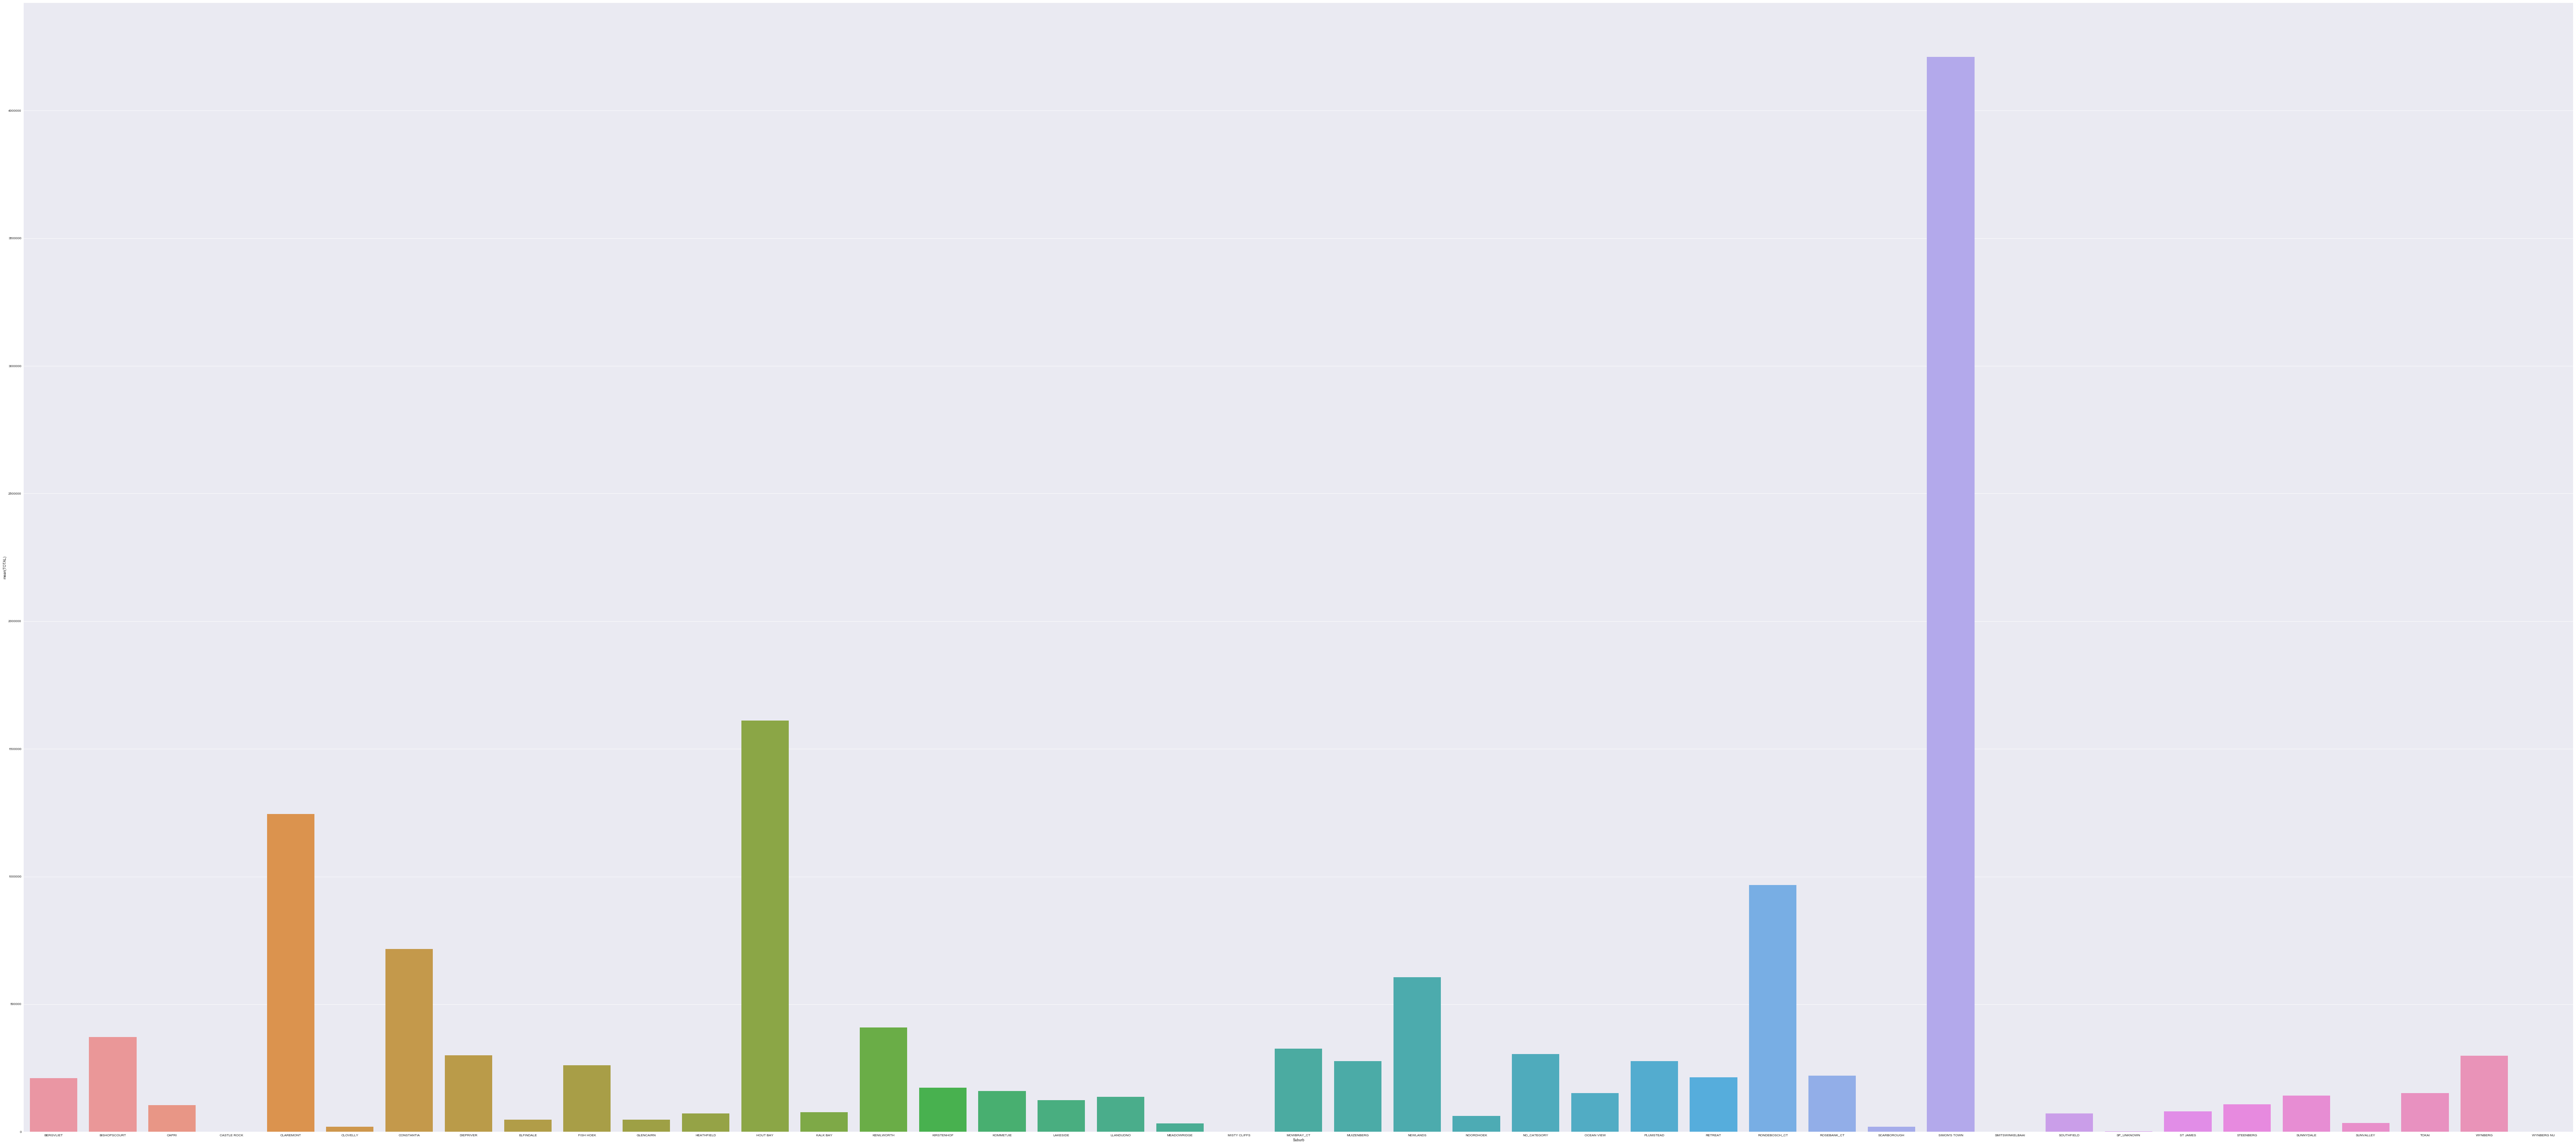

In [72]:
# visualise data
fig, ax = plt.subplots(figsize=(110,50))
ax = sns.barplot(x="Suburb", y="TOTAL", data=H2Odemand)

In [124]:
# save sanitized data to csv
H2Odemand.to_csv('SoutherSuburbs2015.csv')